In [38]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    AdaBoostRegressor,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
    mean_squared_error,
    cohen_kappa_score
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from string import punctuation 

In [3]:
np.random.seed(123)

In [35]:
# result = pd.read_csv('data/processed_essays.tsv', sep='\t')
result = pd.read_csv('data/processed_data_1.tsv', sep='\t')

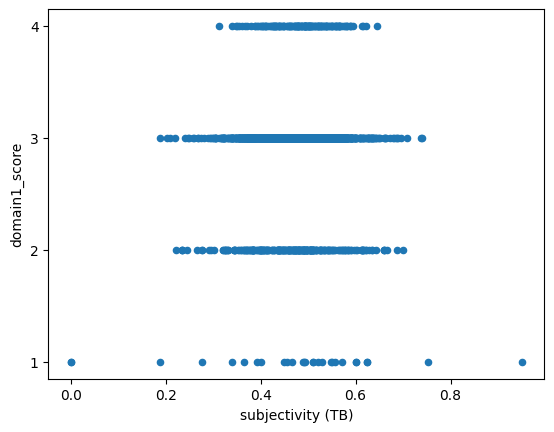

In [67]:
chart = result.plot(kind='scatter', x='subjectivity (TB)', y='domain1_score')
plt.locator_params('y', nbins=4)

In [6]:
result.shape

(1783, 57)

In [7]:
# X = pd.DataFrame(result, columns=('essay', ))
# X = result['lexical_range']
X = pd.DataFrame(result, columns=(
    'ADJ',
    'ADV',
    'ADP',
    'NOUN', 
    'VERB',
    'INTJ',
    'PART',
    'SCONJ',
    'CCONJ',
    'word_count', 
    'sent_count', 
    'polarity (TB)',
    'subjectivity (TB)',
    'positive (VD)',
    'negative (VD)',
    'neutral (VD)',
    'compound (VD)',
    'spelling_errors', 
    'correct_spellings', 
    'lexical_diversity',
    'unique_words',
    'relevance (TF-IDF)',
    'readability',
    'grammar_errors',
#     'relevance (CV)',
))
y = result['domain1_score']
X.isnull().sum()

ADJ                   0
ADV                   0
ADP                   0
NOUN                  0
VERB                  0
INTJ                  0
PART                  0
SCONJ                 0
CCONJ                 0
word_count            0
sent_count            0
polarity (TB)         0
subjectivity (TB)     0
positive (VD)         0
negative (VD)         0
neutral (VD)          0
compound (VD)         0
spelling_errors       0
correct_spellings     0
lexical_diversity     0
unique_words          0
relevance (TF-IDF)    0
readability           0
grammar_errors        0
dtype: int64

In [8]:
# corr = pd.DataFrame(result, columns=('domain1_score', 'adj', 'noun', 'verb', 'adv', 'misspelt', 'correct_spellings', 'lexical_diversity')).corr()
corr = pd.DataFrame(result, columns=(
    'domain1_score', 
    'ADJ',
    'ADV',
    'ADP',
    'NOUN', 
    'VERB',
    'INTJ',
    'PART',
    'SCONJ',
    'CCONJ',
    'word_count', 
    'sent_count', 
    'polarity (TB)',
    'subjectivity (TB)',
    'positive (VD)',
    'negative (VD)',
    'neutral (VD)',
    'compound (VD)',
    'spelling_errors', 
    'correct_spellings', 
    'lexical_diversity',
    'unique_words',
    'relevance (TF-IDF)',
    'readability',
    'grammar_errors',
#     'relevance (CV)',
)).corr()
corr.style.background_gradient(cmap='coolwarm')

,domain1_score,ADJ,ADV,ADP,NOUN,VERB,INTJ,PART,SCONJ,CCONJ,word_count,sent_count,polarity (TB),subjectivity (TB),positive (VD),negative (VD),neutral (VD),compound (VD),spelling_errors,correct_spellings,lexical_diversity,unique_words,relevance (TF-IDF),readability,grammar_errors
domain1_score,1.000000,0.584564,0.533406,0.622604,0.672267,0.624709,0.086332,0.423717,0.358097,0.450447,0.687202,0.597456,-0.024688,0.057836,-0.022609,0.058381,-0.024248,0.026550,0.380292,0.654820,0.064435,0.678723,0.098026,0.370677,0.142746
ADJ,0.584564,1.000000,0.616494,0.700939,0.764805,0.638894,0.035553,0.456901,0.385016,0.534175,0.811777,0.650546,-0.009453,0.092872,0.066617,0.149134,-0.183347,-0.021597,0.435011,0.777742,0.080501,0.781716,0.138943,0.279966,0.186094
ADV,0.533406,0.616494,1.000000,0.646426,0.644728,0.685188,0.114275,0.516041,0.388348,0.553711,0.722578,0.626374,-0.040088,0.067890,-0.007054,0.097844,-0.070597,0.009366,0.385956,0.692655,0.057109,0.699280,0.085922,0.177883,0.198310
ADP,0.622604,0.700939,0.646426,1.000000,0.857474,0.774513,0.072632,0.531642,0.427243,0.574844,0.866509,0.686569,-0.033762,0.041860,-0.049188,0.054464,0.005170,0.021376,0.472785,0.827675,0.126581,0.816792,0.130370,0.268436,0.231809
NOUN,0.672267,0.764805,0.644728,0.857474,1.000000,0.809937,0.050362,0.547144,0.426980,0.603223,0.965527,0.755747,-0.001389,0.055155,0.005760,0.029779,-0.029187,0.050121,0.517721,0.924951,0.182724,0.890685,0.170732,0.356229,0.250051
VERB,0.624709,0.638894,0.685188,0.774513,0.809937,1.000000,0.176952,0.712472,0.567072,0.636303,0.885813,0.762201,-0.000676,0.045975,0.004381,0.035116,-0.031902,0.073305,0.508246,0.838719,0.231164,0.788875,0.135092,0.226179,0.300749
INTJ,0.086332,0.035553,0.114275,0.072632,0.050362,0.176952,1.000000,0.134813,0.101949,0.149457,0.091510,0.154876,0.012094,0.043368,0.066793,0.013841,-0.076382,0.048951,0.177497,0.049567,0.010800,0.091875,-0.044177,0.014919,0.174074
PART,0.423717,0.456901,0.516041,0.531642,0.547144,0.712472,0.134813,1.000000,0.443371,0.459911,0.613621,0.528306,-0.011862,0.055188,-0.057087,0.055819,0.011819,0.073924,0.356117,0.579798,0.189388,0.537768,0.102462,0.100016,0.197509
SCONJ,0.358097,0.385016,0.388348,0.427243,0.426980,0.567072,0.101949,0.443371,1.000000,0.319657,0.481884,0.353958,-0.021567,-0.001714,-0.115096,0.056875,0.067954,-0.020808,0.280428,0.455096,0.325268,0.357853,0.092592,0.118856,0.210691
CCONJ,0.450447,0.534175,0.553711,0.574844,0.603223,0.636303,0.149457,0.459911,0.319657,1.000000,0.642872,0.441999,-0.018403,0.052350,0.029110,0.083812,-0.094694,0.038829,0.353518,0.613243,0.063775,0.610657,0.099465,0.181521,0.275227


In [9]:
print(X.shape)
print(y.shape)

(1783, 24)
(1783,)


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
)

In [11]:
X_train

,ADJ,ADV,ADP,NOUN,VERB,INTJ,PART,SCONJ,CCONJ,word_count,...,negative (VD),neutral (VD),compound (VD),spelling_errors,correct_spellings,lexical_diversity,unique_words,relevance (TF-IDF),readability,grammar_errors
1554,9,10,15,33,23,4,7,5,5,69,...,0.129,0.718,-0.6854,11,58,1.169492,59,0.313786,7.698584,14
1769,33,25,42,118,59,0,14,9,13,189,...,0.000,0.778,0.9984,22,167,1.733945,109,0.814685,8.732712,6
1422,37,21,61,134,62,0,17,12,28,216,...,0.003,0.890,0.9943,22,194,1.510490,143,0.723536,8.709954,8
354,26,20,26,55,36,0,7,4,13,105,...,0.093,0.850,-0.8197,16,89,1.363636,77,0.792359,7.652441,10
450,30,23,57,104,59,1,20,10,14,174,...,0.081,0.817,0.6444,25,149,1.912088,91,0.819593,7.940042,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9,8,25,52,35,0,5,9,6,88,...,0.015,0.932,0.7869,18,70,1.396825,63,0.651238,7.515838,23
1294,35,49,48,111,60,2,13,21,16,204,...,0.092,0.756,0.9868,29,175,1.360000,150,0.591253,7.989248,7
860,45,46,90,142,96,0,14,22,14,253,...,0.111,0.816,-0.9869,81,172,1.324607,191,0.663996,7.718180,56
1459,32,28,62,121,82,0,10,14,19,173,...,0.046,0.826,0.9921,150,23,1.291045,134,0.576911,10.654760,30


In [12]:
y_train

1554    2
1769    3
1422    4
354     3
450     3
       ..
1130    2
1294    4
860     3
1459    3
1126    3
Name: domain1_score, Length: 1515, dtype: int64

In [13]:
autograder = Pipeline(steps=[
#     ('preprocessing', TfidfVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=1000, criterion='entropy'))
#     ('linear', LinearRegression()),
#     ('naive_bayes', MultinomialNB()),
])

In [14]:
autograder.fit(X_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=1000))])

In [15]:
pickle.dump(autograder, open('model.sav', 'wb'))

In [16]:
y_preds = autograder.predict(X_valid)

In [17]:
# # accuracy_score(y_valid, y_preds)
# mse = mean_squared_error(y_valid, y_preds)
# rmse = math.sqrt(mse)
# print(mse)
# print('Accuracy for Random Forest', 100 * max(0, rmse)) 

In [18]:
# r2 = autograder.score(X_valid, y_valid)
# print(f'{r2 * 100}%')

[3]


<AxesSubplot: >

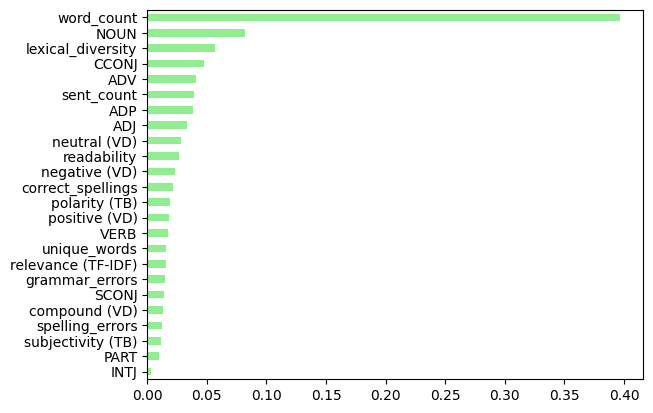

In [19]:
custom_data = pd.read_csv('data/processed_data_TEMP.tsv', sep='\t')
Xcustom = pd.DataFrame(custom_data, columns=(
    'ADJ',
    'ADV',
    'ADP',
    'NOUN', 
    'VERB',
    'INTJ',
    'PART',
    'SCONJ',
    'CCONJ',
    'word_count', 
    'sent_count', 
    'polarity (TB)',
    'subjectivity (TB)',
    'positive (VD)',
    'negative (VD)',
    'neutral (VD)',
    'compound (VD)',
    'spelling_errors', 
    'correct_spellings', 
    'lexical_diversity',
    'unique_words',
    'relevance (TF-IDF)',
    'readability',
    'grammar_errors',
))
predicted_score = autograder.predict(Xcustom)
print(predicted_score)

# Create a pd.Series of features importances
importances = pd.Series(data=autograder[0][1].feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
# plt.title('Features Importances')
# plt.show()

In [20]:
accuracy_score(y_valid, y_preds)

0.8246268656716418

In [21]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           1       0.50      0.60      0.55         5
           2       0.81      0.62      0.71        56
           3       0.86      0.93      0.89       192
           4       0.38      0.33      0.36        15

    accuracy                           0.82       268
   macro avg       0.64      0.62      0.63       268
weighted avg       0.82      0.82      0.82       268



In [22]:
cohen_kappa_score(y_valid, y_preds, weights='quadratic')

0.6968033891777392

<AxesSubplot: >

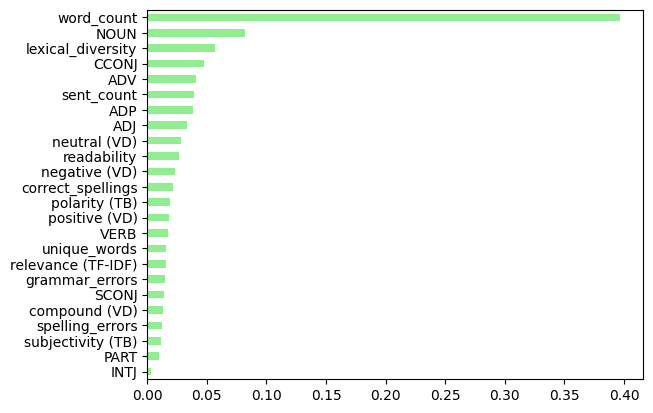

In [23]:
# Create a pd.Series of features importances
importances = pd.Series(data=autograder[0][1].feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
# plt.title('Features Importances')
# plt.show()